# TensorFlow 入門（回帰）
分類と同じく教師あり学習のトピックである回帰についても Keras で実装する方法を学びましょう。
基本的には、分類と同じように実装することができます。

今回は、予習資料でも使用していた家賃の予測に関する回帰の問題です。  

## 一連の流れを確認


### 必要なモジュールの読み込み

下記の ３ つは解析の最初に読み込んでおくと便利です。

- NumPy
- Pandas
- Matplotlib（インラインモードの設定含む）


学習のレイアウトを綺麗にする。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

まずは、データを確認していきましょう。

In [2]:
# CSVファイルの読み込み
df = pd.read_csv('data/housing.csv')

In [3]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


データを確認したところ、今回は入力変数の数が 13 個であることがわかります。

## 入力変数と教師データの作成

それでは入力変数と教師データを切り分けていきましょう。Keras で使用することも念頭に入れて、Pandas で部分抽出した後に、 `.values` でNumPy に変換しておきましょう。 

In [4]:
x = df.iloc[:, :-1].values
t = df.iloc[:, -1].values

In [5]:
x.shape

(506, 13)

In [6]:
t.shape

(506,)

こちらで望ましい形式へと変換することができました。

### データセットの準備

分類の場合でも紹介した方法で、Keras で扱える形式へと変換しましょう。

### 訓練データと検証データに分割

訓練データの数は全体の 70% とできるように、`train_size` の引数として 0.7 を格納しておき、全体からランダムに 70% を訓練データ、残りの 30% を検証データとしましょう。
ここで、**ランダム**という言葉が出てきた際は**再現性の確保**ができているかに注意しましょう。
`train_test_split`でも任意の引数として、`random_state`があるため、しっかり固定しておきましょう。

In [7]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_t, val_t = train_test_split(x, t, train_size=0.7, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
train_x.shape

(354, 13)

In [9]:
len(train_x), len(val_x)

(354, 152)

### ニューラルネットワークのモデルの定義

In [10]:
# Pythonの挙動を整えるライブラリのインポート
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

In [11]:
import os
import random

def reset_seed(seed=0):
    
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

In [12]:
from tensorflow.keras import models,layers

#  シードの固定
reset_seed(0)

# モデルのインスタンス化
model = models.Sequential()

#モデルの構築
model.add(layers.Dense(5, activation='relu', input_shape=(13,)))
model.add(layers.Dense(1))

#最適化手法の設定
optimizer = keras.optimizers.SGD(0.1)

#モデルのコンパイル
model.compile(loss='mean_squared_error', optimizer=optimizer)

### 学習の実行
では、先ほどと同じように学習を実行しましょう。

In [13]:
history = model.fit(train_x, train_t, batch_size=10, epochs=50, verbose=1, validation_data=(val_x, val_t))

Train on 354 samples, validate on 152 samples
Epoch 1/50
354/354 [==============================] - 1s 2ms/sample - loss: 427767976281260608.0000 - val_loss: 584053151608616.3750
Epoch 2/50
354/354 [==============================] - 0s 243us/sample - loss: 45829654181805.9219 - val_loss: 61478491.9474
Epoch 3/50
354/354 [==============================] - 0s 240us/sample - loss: 4826553.8524 - val_loss: 90.0453
Epoch 4/50
354/354 [==============================] - 0s 235us/sample - loss: 85.9857 - val_loss: 83.9380
Epoch 5/50
354/354 [==============================] - 0s 246us/sample - loss: 86.0996 - val_loss: 83.5324
Epoch 6/50
354/354 [==============================] - 0s 252us/sample - loss: 86.4425 - val_loss: 86.5923
Epoch 7/50
354/354 [==============================] - 0s 239us/sample - loss: 86.2200 - val_loss: 84.0742
Epoch 8/50
354/354 [==============================] - 0s 239us/sample - loss: 86.0495 - val_loss: 83.3308
Epoch 9/50
354/354 [==============================] - 0s

### 結果の確認
今回は学習の結果を可視化しましょう。

In [14]:
# 学習結果をPandasのDataFrame型で読み込みます。
results = pd.DataFrame(history.history)

(80, 100)

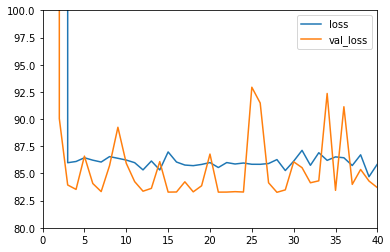

In [15]:
# loss（損失関数）を表示
graph = results[['loss', 'val_loss']].plot()
graph.set_xlim([0,40])
graph.set_ylim([80,100])

In [16]:
#最終誤差のオリジナルスケールでの表示
np.sqrt(results.iloc[-1,1])

9.180599120391136

## 演習課題

上記の結果のように、平均二乗誤差が検証データにおいて84となっており、オリジナルのスケールだと平均で、9.18の誤差が生じていることになり、予測誤差が非常に大きいことがわかります。

この原因を考え、対策をうち、平均二乗誤差を小さくできるようなモデルを考えてみましょう。